In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
from jax_sph.io_state import read_args, read_h5

In [7]:
dir_path = "datasets/2D_HT_SPH_123_20240210-124457"

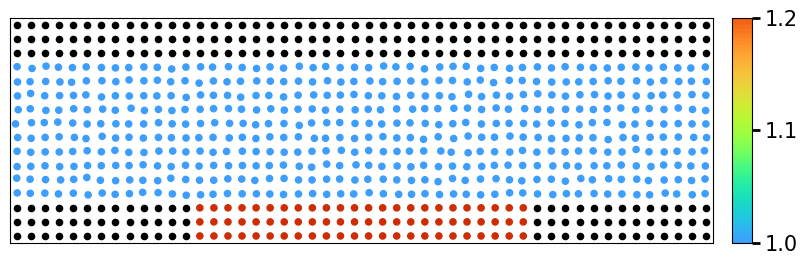

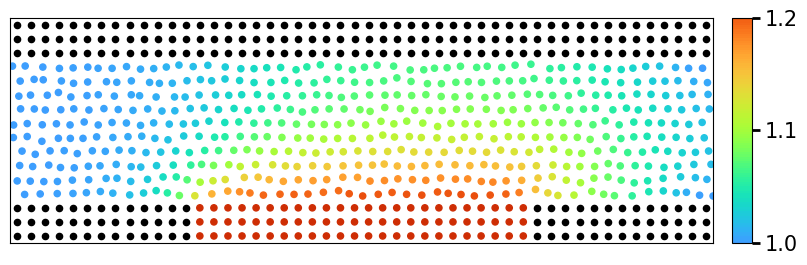

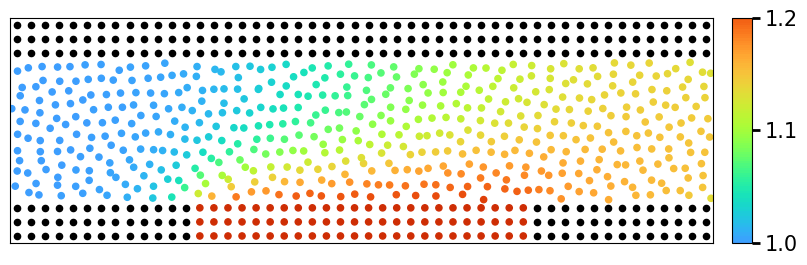

In [20]:
metadata = vars(read_args(f"{dir_path}/args.txt"))

for idx in [0, 1000, 3000]:
    filename = f"{dir_path}/traj_{idx:04d}.h5"
    data_dict = read_h5(filename, array_type="numpy")
    r = data_dict["r"]
    v = data_dict["T"]
    tags = data_dict["tag"]
    wall_mask = tags == 1
    # cmap in ["hsv","cividis", "plasma", "plasma", "cool", "rainbow", "jet", "turbo", "winter", "viridis", "coolwarm"]:
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.scatter(
        r[~wall_mask][:, 0],
        r[~wall_mask][:, 1],
        vmin=0.93,
        vmax=1.27,
        c=v[~wall_mask],
        cmap="turbo",
        s=20,
    )
    ax.scatter(r[wall_mask][:, 0], r[wall_mask][:, 1], c="black", s=20)
    ax.set_xlim(metadata["bounds"][0])
    ax.set_ylim(metadata["bounds"][1])
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()

    # add colorbar underneath the image
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.2)
    cax = fig.add_axes([0.87, 0.2, 0.02, 0.75])

    cbar = fig.colorbar(
        ax.collections[0],
        cax=cax,
        orientation="vertical",
        ticks=[1.0, 1.1, 1.2],
        boundaries=np.linspace(1.0, 1.2, 100),
        values=np.linspace(1.0, 1.2, 99),
    )

    cbar.ax.tick_params(
        labelsize=15,
        length=6,
        width=2,
    )

    fig.savefig(f"HT_T_{idx}.pdf", bbox_inches="tight")
    plt.show()
    plt.close()